## Week 1: Discrete time Markov chain

* Simulating uniform 1D random walk
* Simulating a Markov chain from its transition matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1: Uniform Random Walk

Initialization

In [2]:
nsteps = 1000 #number of steps to simulate
x = np.zeros(nsteps)
x[0] = 0 #initial state

Simulation

In [5]:
for t in range(nsteps - 1):
    if np.random.rand() <= 0.5:
        x[t + 1] = x[t] + 1 
    else:
        x[t + 1] = x[t] - 1

Plotting the outcome of the simulation

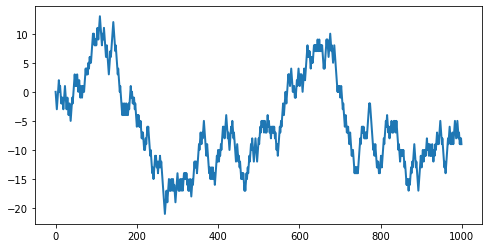

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

To add: Multiple realizations

### Example 2: Simulating a Markov chain using the transition matrix

The following class allows to define a Markov Chain from a transition matrix and its states, and simulate the chain (from https://github.com/PacktPublishing/Hands-On-Markov-Models-with-Python)

In [7]:
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

The next block allows to input a transition matrix, initialize the Markov chain and simulate a realization

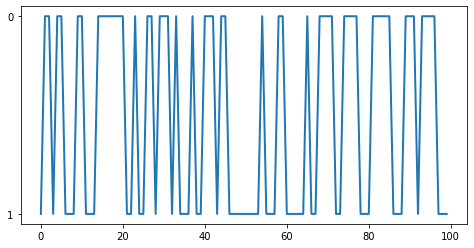

In [8]:
transition_matrix = [[0.5, 0.5], [0.5,  0.5]]# Input your transition matrix here
example_chain = MarkovChain(transition_matrix=transition_matrix, states=['0', '1']) # Name your states here
simulation= example_chain.generate_states(current_state='0', no=100) #Simulate the chain (specify the number of states here)
arr = np.array(simulation)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(arr, lw=2)

To add, multiple realizations and empirical distribution after N steps

Exercises for students: See how to implement multiple examples, get empirical distributions and compare with theoretical results